In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## <center>Data Prep<center>

In [2]:
df = pd.read_csv('PREDICTING_MUSIC_TASTE.csv')
df.columns

Index(['Timestamp', 'Username', 'What is your Age group?',
       'Listen to this track: https://drive.google.com/file/d/1rwGF1ckRVVpCphS0csaBtxMgAvcK7Uh2/view?usp=drive_link\n\nRate your thoughts on Med Tempo song: (no lyrics)',
       'Listen to this track: https://drive.google.com/file/d/1v7P1cyEbCUpjennjKGtEWsOxFevRbuOm/view?usp=drive_link\n\nRate your thoughts on EDM: (high rhythm) (no lyrics)',
       'Listen to this track: https://drive.google.com/file/d/1sxr_69KWXTIW3UdTYmTyzwe9L0F-MqO2/view?usp=drive_link \n\nRate your thoughts on Slow Tempo song: (no lyrics)',
       'Listen to this track: https://drive.google.com/file/d/1XbWvjMziAN5S1eP4hme5xSLtFnHqHR30/view?usp=drive_link \n\nRate your thoughts on Monophonic Song',
       'Listen to this track: https://drive.google.com/file/d/1O7fk84p7-wVnZi60s3qxi-6xO_L0APaM/view?usp=drive_link \n\nRate your thoughts on Polyphonic Song',
       'Listen to this track: https://drive.google.com/file/d/1KQ7lH-N-1HRCOaz9ZhUl-Olmr2z2PUCl/view?us

In [3]:
df = df.drop(columns=['Unnamed: 20', 'Unnamed: 21'])
new_cols = ['timestamp', 'respondant', 'age_group', 'med_tempo_rating', 'high_tempo_rating', 'slow_tempo_rating', 'monophonic_rating', 'polyphonic_rating', 
            'homophonic_rating', 'jazz_mono_rating', 'jazz_homo_rating', 'listen_on_the_go', 'listen_when_exercising',
            'listen_when_cooking', 'listen_in_background', 'fav_winds', 'fav_brass', 'fav_percussion', 'fav_strings', 'comments']
df.columns = new_cols

df.columns

Index(['timestamp', 'respondant', 'age_group', 'med_tempo_rating',
       'high_tempo_rating', 'slow_tempo_rating', 'monophonic_rating',
       'polyphonic_rating', 'homophonic_rating', 'jazz_mono_rating',
       'jazz_homo_rating', 'listen_on_the_go', 'listen_when_exercising',
       'listen_when_cooking', 'listen_in_background', 'fav_winds', 'fav_brass',
       'fav_percussion', 'fav_strings', 'comments'],
      dtype='object')

In [4]:
df.head()

,timestamp,respondant,age_group,med_tempo_rating,high_tempo_rating,slow_tempo_rating,monophonic_rating,polyphonic_rating,homophonic_rating,jazz_mono_rating,jazz_homo_rating,listen_on_the_go,listen_when_exercising,listen_when_cooking,listen_in_background,fav_winds,fav_brass,fav_percussion,fav_strings,comments
0,2024/12/12 2:01:05 PM EST,jm5915@columbia.edu,20-29,3,5,5,4,2,4,3,4,First,Third,Second,Fourth,Fourth,First,Second,Third,NaN
1,2024/12/12 2:49:21 PM EST,krz2110@columbia.edu,20-29,5,5,5,3,5,4,5,5,First,Fourth,Fourth,Second,Third,Second,First,Fourth,NaN
2,2024/12/12 2:50:22 PM EST,rjk2179@columbia.edu,10-19,4,4,5,2,3,4,3,4,First,Second,Third,Fourth,Fourth,Third,First,Second,I love you pookie
3,2024/12/12 5:19:26 PM EST,ch3718@columbia.edu,20-29,4,4,5,1,3,3,4,5,First,Second,Fourth,Third,Second,Third,Fourth,First,:)
4,2024/12/12 7:01:48 PM EST,ssd2185@columbia.edu,10-19,4,2,5,2,3,4,4,5,First,Third,Fourth,Second,Second,First,Fourth,Third,NaN


In [5]:
# integer encoding the age_group values
conditions = [
    df['age_group'] == '0-9',
    df['age_group'] == '10-19',
    df['age_group'] == '20-29',
    df['age_group'] == '30-39',
    df['age_group'] == '40-49',
    df['age_group'] == '50-59',
    df['age_group'] == '60-69',
    df['age_group'] == '70-79',
    df['age_group'] == '80-89',
    df['age_group'] == '90+'
]
choices = [0,1,2,3,4,5,6,7,8,9]

df['age_group'] = np.select(conditions, choices, default=np.nan)

In [6]:
# changing the data type of the ranking columns for plotting

to_edit = ['listen_on_the_go', 'listen_when_exercising','listen_when_cooking', 
           'listen_in_background', 'fav_winds', 'fav_brass', 'fav_percussion', 'fav_strings']

choices = [1, 2, 3, 4]
for col in to_edit:
    conditions = [df[col] == 'First', df[col] == 'Second', df[col] == 'Third', df[col] == 'Fourth']
    df[col] = np.select(conditions, choices, default=np.nan)

df.describe()

,age_group,med_tempo_rating,high_tempo_rating,slow_tempo_rating,monophonic_rating,polyphonic_rating,homophonic_rating,jazz_mono_rating,jazz_homo_rating,listen_on_the_go,listen_when_exercising,listen_when_cooking,listen_in_background,fav_winds,fav_brass,fav_percussion,fav_strings
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000
mean,2.162162,3.378378,3.135135,3.810811,2.810811,3.270270,3.351351,3.621622,4.135135,1.513514,2.378378,3.243243,2.918919,2.486486,2.729730,2.444444,2.135135
std,0.928365,1.114335,1.357329,1.150793,1.174683,1.170201,1.005988,1.009713,0.821995,0.768173,1.009713,0.894595,1.037582,1.121052,1.170201,1.080858,1.134366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.750000,1.000000
50%,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.500000,2.000000
75%,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               37 non-null     object 
 1   respondant              37 non-null     object 
 2   age_group               37 non-null     float64
 3   med_tempo_rating        37 non-null     int64  
 4   high_tempo_rating       37 non-null     int64  
 5   slow_tempo_rating       37 non-null     int64  
 6   monophonic_rating       37 non-null     int64  
 7   polyphonic_rating       37 non-null     int64  
 8   homophonic_rating       37 non-null     int64  
 9   jazz_mono_rating        37 non-null     int64  
 10  jazz_homo_rating        37 non-null     int64  
 11  listen_on_the_go        37 non-null     float64
 12  listen_when_exercising  37 non-null     float64
 13  listen_when_cooking     37 non-null     float64
 14  listen_in_background    37 non-null     floa

## <center>Plotting<center>

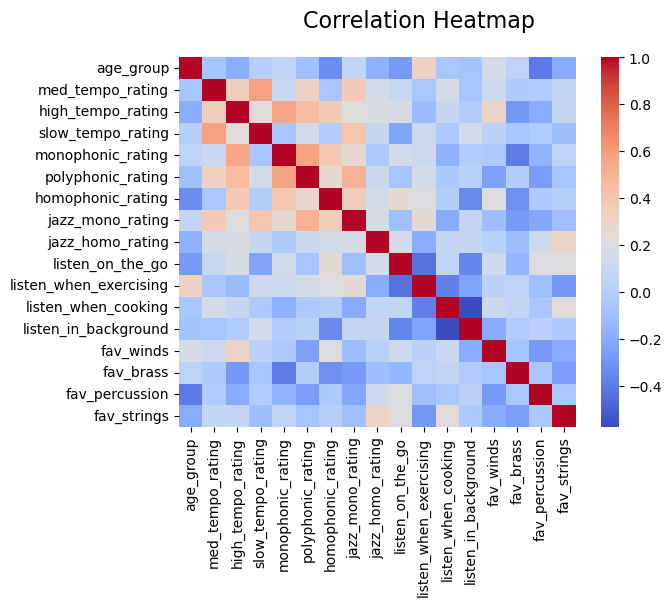

In [8]:
# correlation heatmap
corrs = df.select_dtypes(exclude=['object']).corr()

sns.heatmap(corrs, annot=False, cmap='coolwarm')
plt.suptitle('Correlation Heatmap', fontsize=16)
plt.show()

In [9]:
def grouped_bar_chart(rank_mean_dict, ranks, title):
    x = np.arange(len(ranks))*19
    width = 1.7
    spacer = 0  

    fig, ax = plt.subplots(figsize=(12, 5))

    for key, values in rank_mean_dict.items():
        offset = spacer * width
        bars = ax.bar(x + offset, values, width, label=key, zorder=3)
        ax.bar_label(bars, rotation=90, padding=4)
        spacer += 1 

    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7, zorder=0)
    ax.set_ylabel('Mean Values')
    ax.set_title(title)
    ax.set_xticks(x + (width * len(rank_mean_dict) / 2) - (width / 2), ranks) 
    max_y_value = max(max(values) for values in rank_mean_dict.values())
    ax.set_ylim(0, max_y_value * 1.3)
    ax.legend(loc='upper right', ncols=1, bbox_to_anchor=(1.22, 1)) 
    
    plt.show()

In [10]:
'''
Given where a respondant ranked highest where/when they lsiten to music, here are basic stats about their responses
'''

# organizing data
on_the_go = df[df['listen_on_the_go'] == 1]
exercising = df[df['listen_when_exercising'] == 1]
cooking = df[df['listen_when_cooking'] == 1]
background = df[df['listen_in_background'] == 1]

top_location_ranks = ('On The Go', 'Exercising', 'Cooking', 'Background')
cols = ['age_group', 'med_tempo_rating', 'high_tempo_rating', 'slow_tempo_rating', 'monophonic_rating', 
        'polyphonic_rating', 'homophonic_rating', 'jazz_mono_rating', 'jazz_homo_rating']

location_rank_means = {}
for col in cols:
    location_rank_means[col] = (np.mean(on_the_go[col]), np.mean(exercising[col]), np.mean(cooking[col]), np.mean(background[col]))

In [11]:
'''
Given where a respondant ranked which instrument group the highest, here are basic stats about their responses
'''

winds = df[df['fav_winds'] == 1]
brass = df[df['fav_brass'] == 1]
percussion = df[df['fav_percussion'] == 1]
strings = df[df['fav_strings'] == 1]

top_instrument_ranks = ('Winds', 'Brass', 'Percussion', 'Strings')
cols = ['age_group', 'med_tempo_rating', 'high_tempo_rating', 'slow_tempo_rating', 'monophonic_rating', 
        'polyphonic_rating', 'homophonic_rating', 'jazz_mono_rating', 'jazz_homo_rating']

instrument_rank_means = {}
for col in cols:
    instrument_rank_means[col] = (np.mean(winds[col]), np.mean(brass[col]), np.mean(percussion[col]), np.mean(strings[col]))

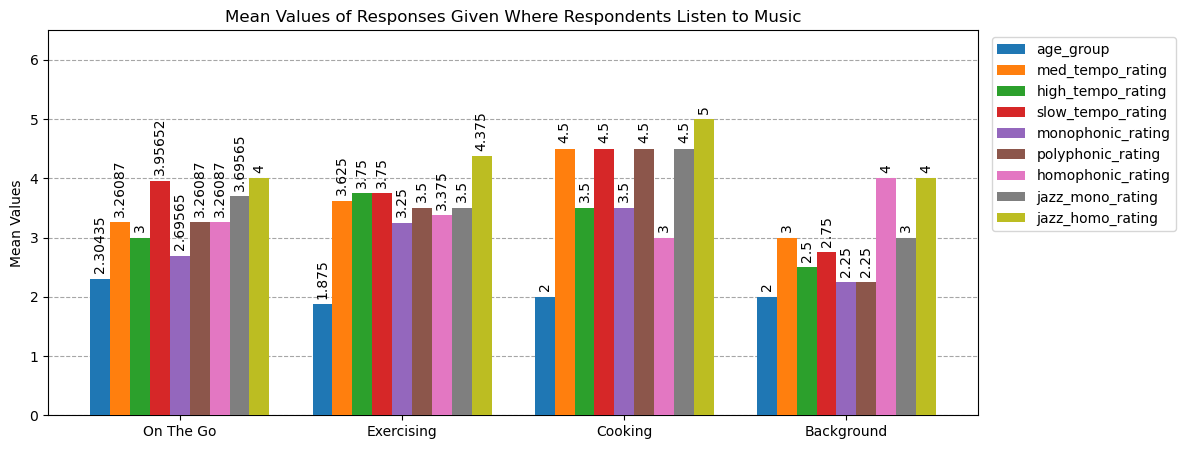

In [12]:
grouped_bar_chart(location_rank_means, top_location_ranks, 'Mean Values of Responses Given Where Respondents Listen to Music')

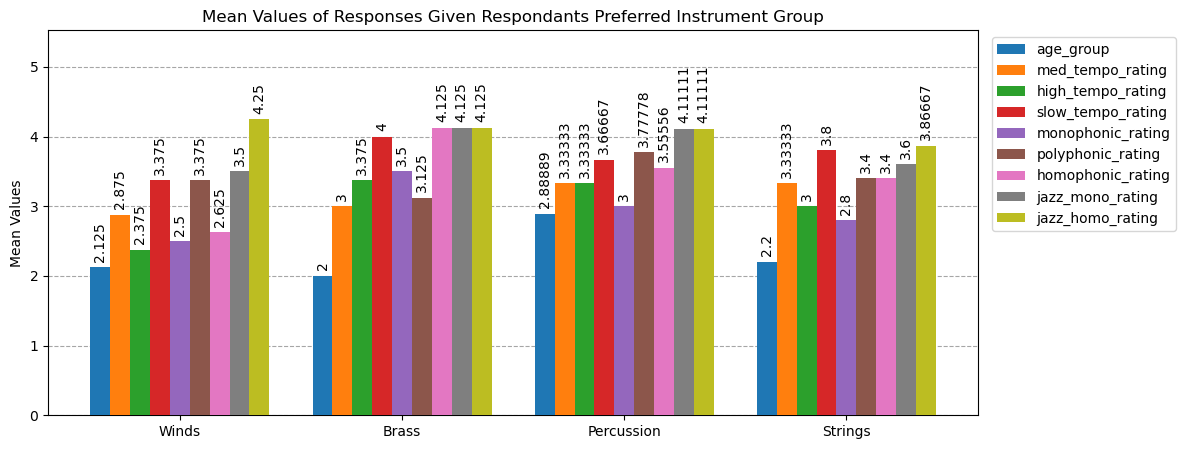

In [13]:
grouped_bar_chart(instrument_rank_means, top_instrument_ranks, 'Mean Values of Responses Given Respondants Preferred Instrument Group')

In [14]:
slow_tempo = df[df['slow_tempo_rating'] >= 4]
slow_tempo.name = 'Slow Tempo'
mid_tempo = df[df['med_tempo_rating'] >= 4]
mid_tempo.name = 'Mid Tempo'
high_tempo = df[df['high_tempo_rating'] >= 4]
high_tempo.name = 'High Tempo'

tempos = [slow_tempo, mid_tempo, high_tempo]
fav_instruments = ['fav_winds', 'fav_brass', 'fav_percussion', 'fav_strings']

In [19]:
def instrument_rankings_for_tempo(tempo):

    fav_instruments = ['fav_winds', 'fav_brass', 'fav_percussion', 'fav_strings']
    labels = ['First', 'Second', 'Third', 'Fourth']
    colors = ['Blue', 'Green', 'Orange', 'Red']

    fig, axs = plt.subplots(1, 4, figsize=(15,5))

    for i, instrument in enumerate(fav_instruments):
        rating_dict = dict(tempo[instrument].value_counts())
        rating_dict = dict(sorted(rating_dict.items()))

        bars = axs[i].bar(labels, rating_dict.values(), label=rating_dict.keys(), color=colors, edgecolor='black', zorder=3)
        axs[i].set_title(instrument[4:])
        axs[i].bar_label(bars, padding=3)
        axs[0].set_ylabel('Count')
        axs[i].set_ylim(0, max(rating_dict.values())*1.1)
        axs[i].grid(axis='y', linestyle='--', color='gray', alpha=0.7, zorder=0)

    plt.suptitle(f'Counts of Instrument Rankings Given {tempo.name} Preference', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

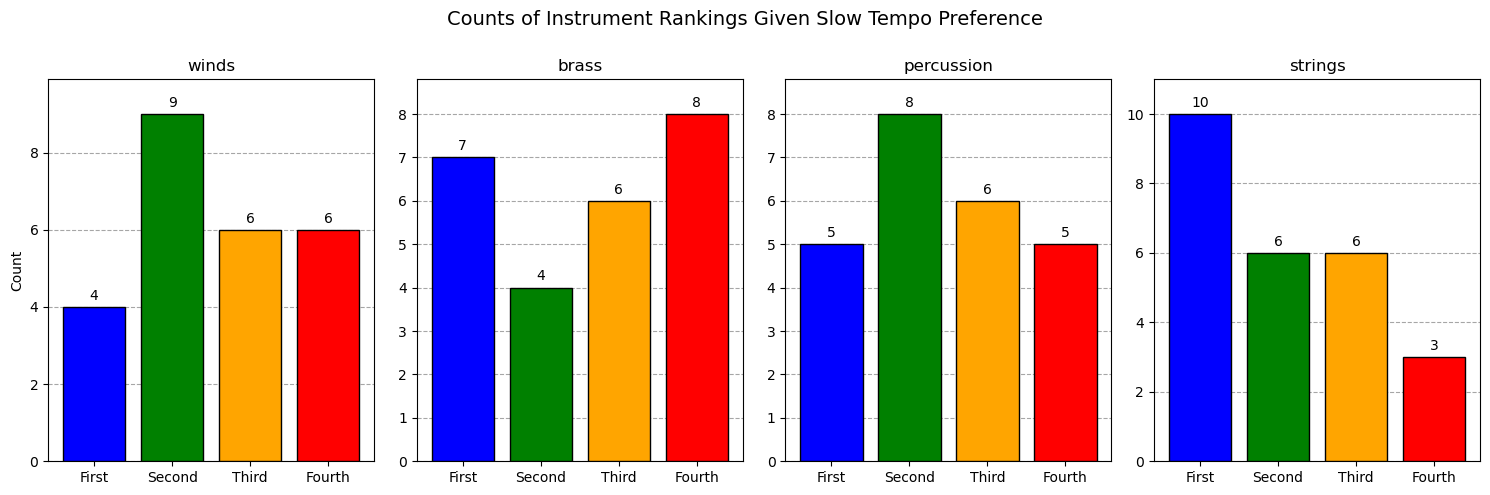

In [20]:
instrument_rankings_for_tempo(slow_tempo)

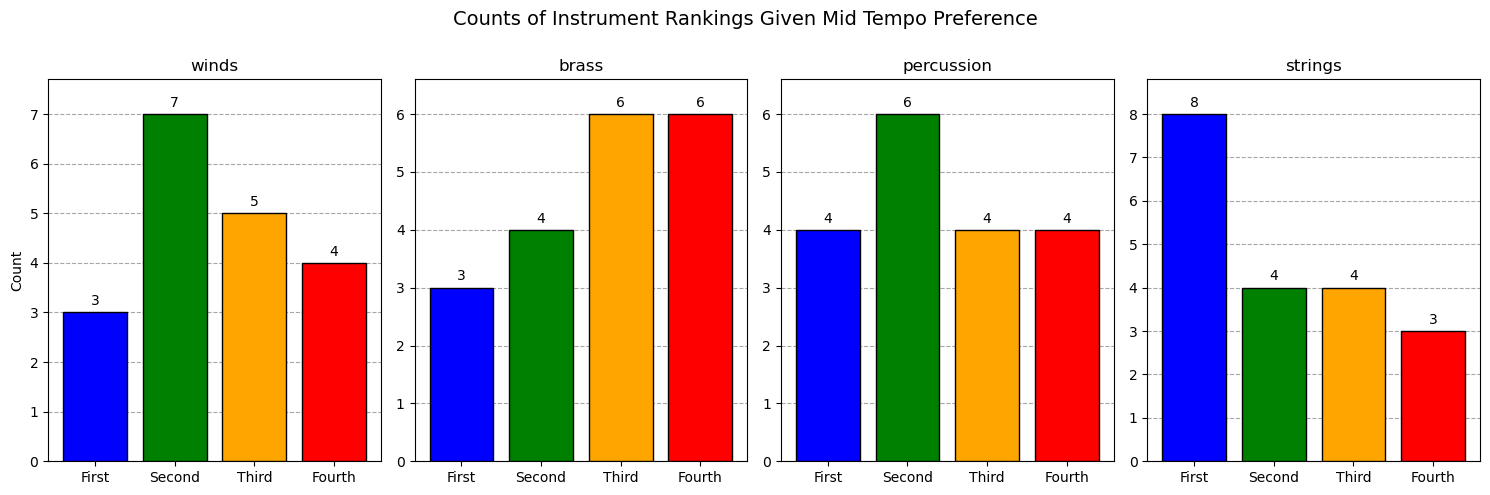

In [21]:
instrument_rankings_for_tempo(mid_tempo)

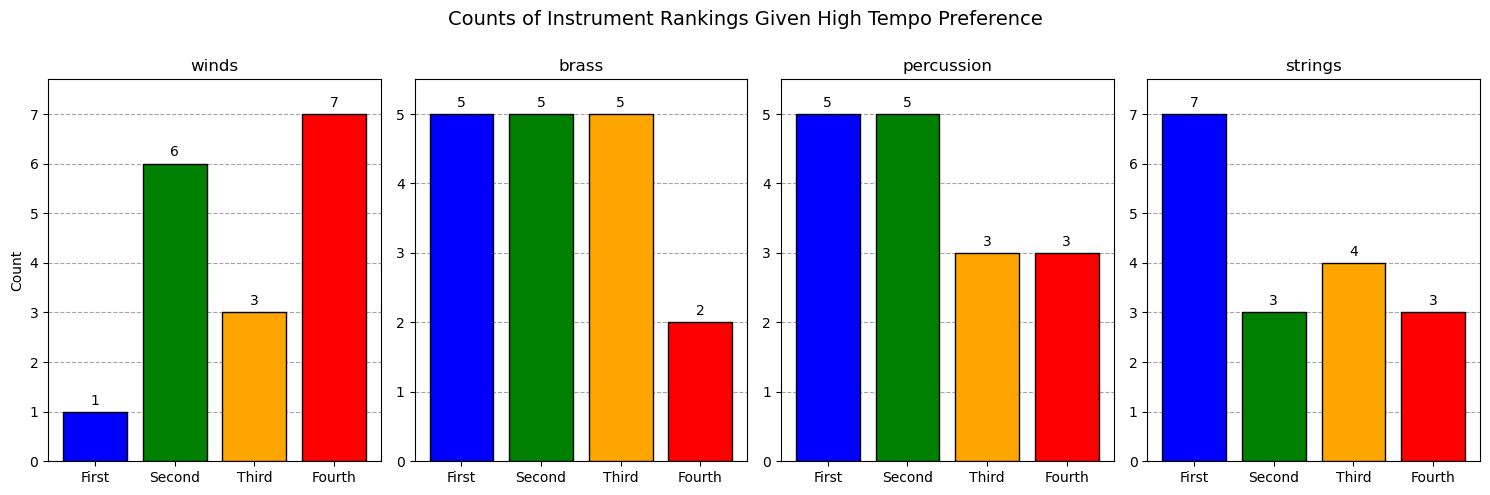

In [22]:
instrument_rankings_for_tempo(high_tempo)